In [11]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
np.random.seed(1234)

In [3]:
# 500 instances of data per class for the Task Manager
num_samples = 5000

We are trying to create a model for our task manager web app that will assign 'Priority & Urgency' scores with given some features or input. What I have thought would be important in this model for task manager would be features like:

* Importance of task: User while creating defines their level of importance of the task in range of 1 to 10 where 10 will be a task of most importance.

* Complexity of task: User defines how complex it the task in range of 1 to 10 where 10 will be most complex task.

* Days Remaining till Deadline: Days till the task has to be completed. Less days means task is more urgent.

* Estimated time for task completion: Defines how many days does it take to complete the task actually.

* Category of task: I have assigned 10 categories and one Others category with their respective weight values as:
    1. 'Health': 10,
    2. 'Family': 9,
    3. 'Work': 8,
    4. 'Finance': 8,
    5. 'Education': 7,
    6. 'Personal': 5,
    7. 'Career': 6,
    8. 'Social': 4,
    9. 'Household errands': 3,
    10. 'Entertainment': 4,
    11. 'Others': 2

In [4]:
category_dict = {
    'Health': 10,
    'Family': 9,
    'Work': 8,
    'Finance': 8,
    'Education': 7,
    'Personal': 5,
    'Career': 6,
    'Social': 4,
    'Household errands': 3,
    'Entertainment': 4,
    'Others': 2
}


# Generate random data for each priority level
importance = np.random.randint(1, 11, num_samples)
complexity = np.random.randint(1, 11, num_samples)
days_till_deadline = np.random.randint(1, 31, num_samples)
estimated_days = np.random.randint(1, 31, num_samples)
category_values = np.random.choice(list(category_dict.values()), size=num_samples)



### Creating DataFrame

###### Creating Target Column

For target column, we will consider all feature columns and multiply with some weights and obtain a value.

In [5]:
# Generating priority based on the provided insights
priority = 0.4 * importance + 0.3 * complexity + 0.2 / days_till_deadline + 0.1 * (estimated_days / days_till_deadline) + category_values

# Normalize priority to be in the range of 1-5
priority = 1 + 4 * (priority - min(priority)) / (max(priority) - min(priority))

In [6]:
# Creating a DataFrame with the generated data
data = pd.DataFrame({
    'Importance': importance,
    'Complexity': complexity,
    'Days_till_Deadline': days_till_deadline,
    'Estimated_Days': estimated_days,
    'Category': category_values,
    'Priority': priority
})
data

,Importance,Complexity,Days_till_Deadline,Estimated_Days,Category,Priority
0,4,5,25,3,5,2.364103
1,7,8,23,6,2,2.137124
2,6,1,30,13,5,2.269231
3,5,3,30,4,8,3.082051
4,9,2,8,11,9,3.708333
...,...,...,...,...,...,...
4995,3,7,29,13,8,3.192750
4996,4,8,28,29,7,3.130952
4997,6,1,17,25,10,3.579186
4998,4,8,20,18,3,2.102564


In [7]:
data["Priority"].min(), data["Priority"].max()

(1.0, 5.0)

In [8]:
data["Target"] = data["Priority"].round().astype(int)
data["Target"].value_counts()

3    2152
2    1570
4    1128
1     119
5      31
Name: Target, dtype: int64

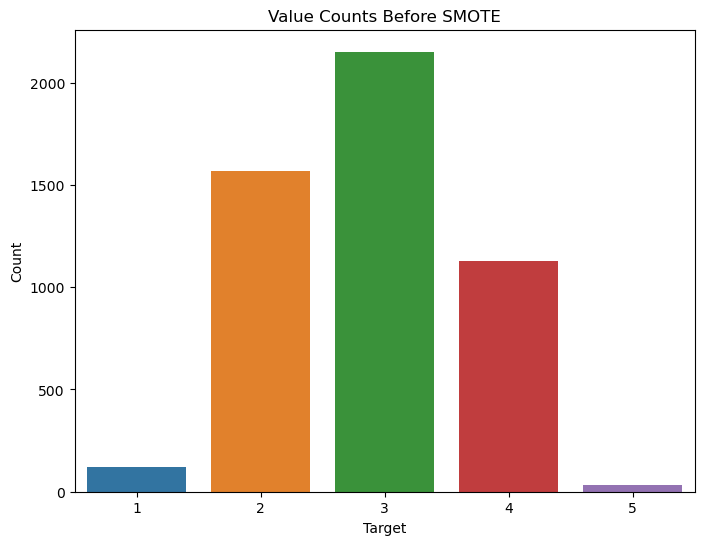

In [12]:
# Visualize the value counts
plt.figure(figsize=(8, 6))
sns.countplot(x=data["Target"])
plt.title('Value Counts Before SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [13]:
# Separate features and target
X = data.drop(['Priority', 'Target'], axis=1)
y = data['Target']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=1234)


In [15]:
smote = SMOTE(random_state=1234, k_neighbors=5)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



Value counts after SMOTE:
3    1722
4    1722
2    1722
1    1722
5    1722
Name: Target, dtype: int64


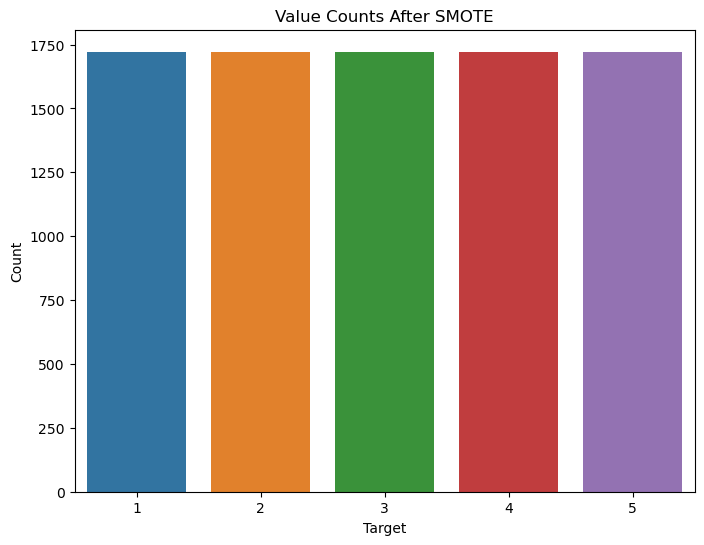

In [16]:
# Display the value counts after SMOTE
print("\nValue counts after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Visualize the value counts
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Value Counts After SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [17]:
clf = RandomForestClassifier(random_state=1234)

In [18]:
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1234)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [21]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.88      0.91        24
           2       0.95      0.99      0.97       314
           3       0.97      0.90      0.93       430
           4       0.88      0.96      0.92       226
           5       0.83      0.83      0.83         6

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



In [22]:
from sklearn.svm import SVC

In [23]:
svm_clf = SVC(random_state=1234)

In [24]:
svm_clf.fit(X_train_resampled, y_train_resampled)

SVC(random_state=1234)

In [25]:
svm_y_pred = svm_clf.predict(X_test)

In [26]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_classification_report_str = classification_report(y_test, svm_y_pred)

In [27]:
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Classification Report:")


SVM Accuracy: 0.90
SVM Classification Report:


In [28]:
# import pickle

# with open('svm_model.pkl', 'wb') as model_file:
#     pickle.dump(svm_clf, model_file)

In [31]:
# import pickle

# with open('rf_model.pkl', 'wb') as model_file:
#     pickle.dump(clf, model_file)

In [32]:
'''    'Importance': importance,
    'Complexity': complexity,
    'Days_till_Deadline': days_till_deadline,
    'Estimated_Days': estimated_days,
    'Category': category_values,
    'Priority': priority'''


feature_1 = [[6,6,20,5,6]] # 
feature_2 = [[1,1,20,1,3]] # 
feature_3 = [[6,2,20,10,4]] # 
feature_4 = [[6,8,20,15,5]] # 
feature_5 = [[9,5,20,20,8]] # 

features = [feature_1,feature_2,feature_3,feature_4,feature_5]


for feature in features:
    print(svm_clf.predict(feature))

[3]
[1]
[2]
[3]
[4]


/home/contra/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/contra/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/contra/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/contra/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/contra/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
svm_y_pred[svm_y_pred==5]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [34]:
print(svm_clf.predict([[10,10,10,10,10]]))


[5]


/home/contra/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
